- https://facebook.github.io/prophet/docs/quick_start.html#python-api
- http://datalove.hatenadiary.jp/entry/python/prophet/getting-started-with-facebook-machine-learning-library-for-time-series-analysis
- https://www.slideshare.net/hoxo_m/prophet-facebook-76285278
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
from numpy.random import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
import pickle
import time
import datetime
import json
import itertools
import collections
import os

In [32]:
df_market_spread=pd.read_csv("View of Market Spread_2017.csv")
df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date
df_market_spread.head()

,bitFlyer,Quoine,BtcBox,Zaif,coincheck,Spread pair,Max spread,Date
Date,,,,,,,,
2016-12-15 01:56:00,90474,90663.00000,90454.0,90445,90799,coincheck - Zaif,354.0,2016-12-15 01:56:00
2016-12-15 02:01:00,90508,90659.84543,90542.0,90500,90849,coincheck - Zaif,349.0,2016-12-15 02:01:00
2016-12-15 02:06:00,90637,90799.58457,90657.0,90620,90950,coincheck - Zaif,330.0,2016-12-15 02:06:00
2016-12-15 02:11:00,90620,90771.10274,90877.0,90650,90943,coincheck - bitFlyer,323.0,2016-12-15 02:11:00
2016-12-15 02:16:00,90626,90808.00000,90793.0,90630,90894,coincheck - bitFlyer,268.0,2016-12-15 02:16:00


In [33]:
df_market_spread["spread_quoine_coincheck"] = df_market_spread["Quoine"] - df_market_spread["coincheck"] 

In [4]:
# import itertools
# exchange_pairs = list(itertools.permutations(["bitFlyer","Quoine","Zaif","coincheck" ], 2))
# exchange_pair_list = list(map(lambda pair: "spread_"+pair[0] + '_' + pair[1], exchange_pairs))
# for name, pair in zip(exchange_pair_list,exchange_pairs):
#     print(name, pair)
#     df_market_spread[name] = df_market_spread[pair[0]] - df_market_spread[pair[1]]

In [34]:
df_market_spread_2017=df_market_spread[(df_market_spread['Date']>"2017-01-01") & (df_market_spread['Date']<"2017-12-31")]

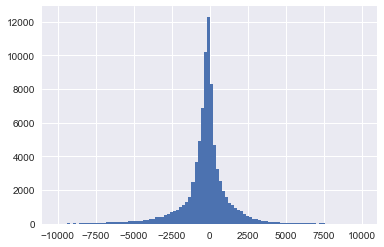

In [36]:
df_market_spread_2017["spread_quoine_coincheck"].hist(bins=100, range=(-10000, 10000))

In [37]:
df=pd.DataFrame()
df[["ds","y"]]=df_market_spread_2017[["Date","spread_quoine_coincheck"]]
df=df[(df['y']>-10000) & (df['y']<10000)]

In [38]:
df.head()

,ds,y
Date,,
2017-01-01 00:01:00,2017-01-01 00:01:00,-3392.0000
2017-01-01 00:06:00,2017-01-01 00:06:00,-3613.0000
2017-01-01 00:11:00,2017-01-01 00:11:00,-3361.0287
2017-01-01 00:16:00,2017-01-01 00:16:00,-3578.0000
2017-01-01 00:21:00,2017-01-01 00:21:00,-3314.0000


In [49]:
df.tail()

,ds,y
Date,,
2017-10-29 13:31:00,2017-10-29 13:31:00,1908.0
2017-10-29 13:41:00,2017-10-29 13:41:00,1740.0
2017-10-29 13:46:00,2017-10-29 13:46:00,1948.0
2017-10-29 13:51:00,2017-10-29 13:51:00,1583.0
2017-10-29 13:56:00,2017-10-29 13:56:00,2077.0


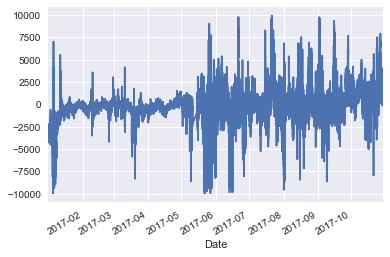

In [39]:
df["y"].plot()

In [40]:
m = Prophet()
m.fit(df)

In [41]:
# periodは予測期間
future = m.make_future_dataframe(periods=1)
future.tail()

,ds
83756,2017-10-29 13:41:00
83757,2017-10-29 13:46:00
83758,2017-10-29 13:51:00
83759,2017-10-29 13:56:00
83760,2017-10-30 13:56:00


In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
83756,2017-10-29 13:41:00,1016.917703,-822.907022,2716.676500
83757,2017-10-29 13:46:00,1014.567431,-806.649984,2616.918924
83758,2017-10-29 13:51:00,1012.205309,-774.542485,2614.963284
83759,2017-10-29 13:56:00,1009.841561,-849.770762,2760.894430
83760,2017-10-30 13:56:00,1001.823358,-659.531406,2586.336147


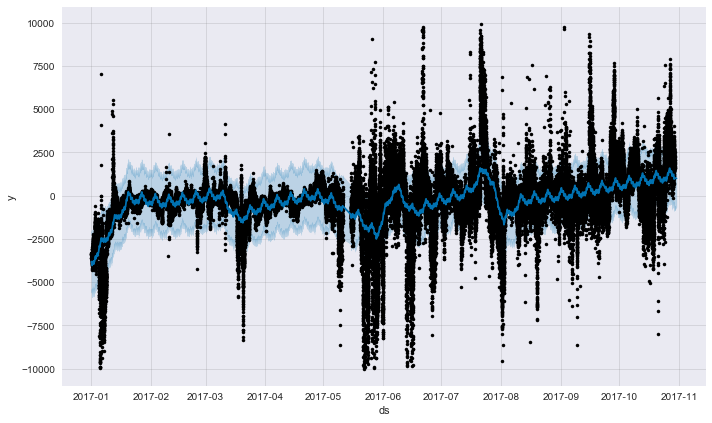

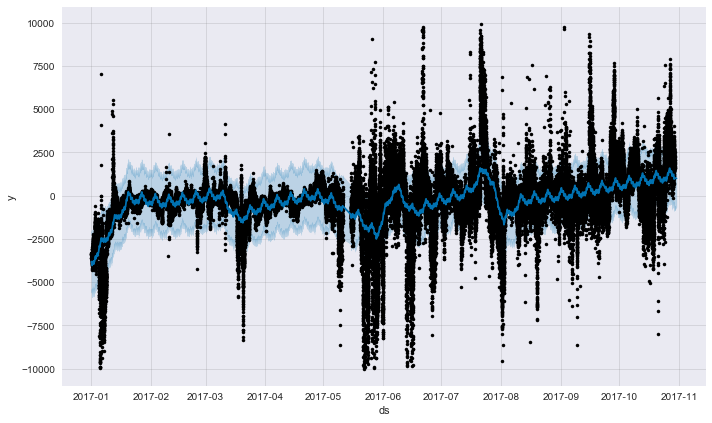

In [43]:
m.plot(forecast)

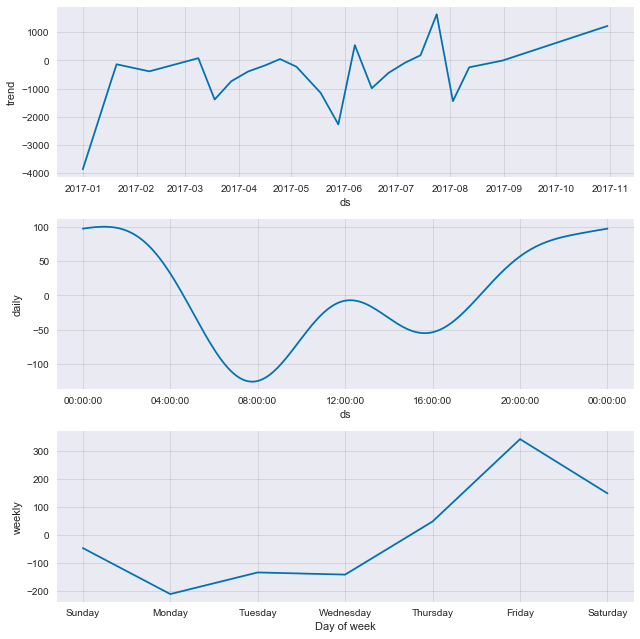

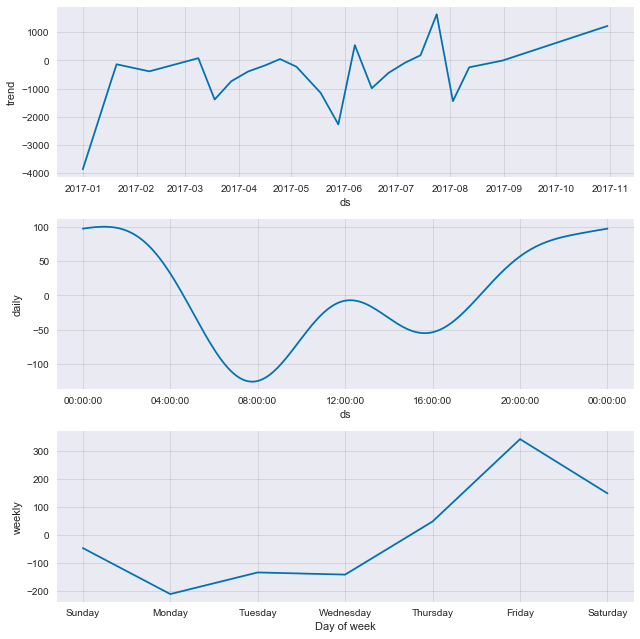

In [44]:
m.plot_components(forecast)

In [56]:
with open("./prophet_spread_model_tina2017.dump","wb") as f:
    pickle.dump(m, f)